In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os, sys, email, re, string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
import regex as re # Regular Expression
from sqlalchemy import create_engine
from PIL import Image
from palettable.colorbrewer.qualitative import Dark2_8
import numpy as np
import random
# Stopwords: Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences.
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
engine = psycopg2.connect(
                     host = "database-1.cartuziufdwi.us-east-1.rds.amazonaws.com",
                     database = "postgres",
                     user = "postgres",
                     password = "password1!",
                     port = "5432" )

In [4]:
cur = engine.cursor()
cur.execute("select * from corpus2")
data= cur.fetchall()
corpus2_df = pd.DataFrame(data)
engine.close()

In [5]:
corpus2_df

0
0       sara confirm confirmation trade paribas master...
1       sara shackleton texas sara shackleton shacklet...
2       cheryl amendment execution signer amendment va...
3       brent shackleton brent hendry development sara...
4       sara justin boyd justin sent justin ltd justin...
...                                                   ...
224102  draft isda boilerplate schedule credit support...
224103  amendment mm credit approval shackleton sara b...
224104                               doukas sent guaranty
224105  janine union bank funb credit trade trader lon...
224106  joe attachment draft confirm pat proposal shac...

[224107 rows x 1 columns]

In [6]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

In [7]:
# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

# Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown",'fwd','RE','FW','b','c',
    'enron','hou','ect','corp','please','vince','time','mail','john','kay','day','message','week','kaminski','year','e','r','l','th',
    'meeting','enronxgate','question','group','work','call','scott','change','company','let','mann','date','number','asp','ee','id',
    'mark','today','david','mike','issue','houston','chris','subject','way','bass','jeff','edu','office','doc','don','j','f','image',
    'month','copy','name','comment','email','need','phone','point','thing','request','look','ben','michael','list','rows','columns',
    'help','delainey','fax','morning','use','tomorrow','thank','phillip','hotmail','guy','robert','night','lon','p','zuffe','x','pdf',
    'part','talk','kate','home','mailto','person','address','form','jeffrey','something','end','line','hour','k','prc','spec','inc',
    'place','march','love','anything','paul','giron','smith','hope','darron','jim','kevin','weekend','george','book','report','w','letter',
    'north','someone','section','richard','discus','bob','jacoby','ena','room','see','demand','desk','area','acrobat','stephane','comment',
    'everyone','greg','detail','jason','afternoon','discussion','tom','kslaw','check','basis','visit','mcconnell','adobe','brodeur','letter',
    'miller','entity','location','peter','monday','response','show','page','jennifer','lot','meet','respond','fon','im','src','gif','year',
    'yesterday','pdx','house','june','larry','jan','dan','city','july','judy','friday','julie','shirley','meter','cand','tor','lal','time',
    'Hello','Meeting','Ga','Access','positions','list','forward','floor','collar','fixed','thanks','script','face','mini','adobe','','align',
    'level','fyi','addition','martin','anyone','generation','department','type','rick','friend','period','word','player','cooke','doucet',
    'lisa','think','class','johnson','org','robin','thompson','columbiagas','didn','april','william','lee','thomas','cc','zufferli','html',
    'hey','adam','stephen','man','sender','tim','taylor','organization','center','everything','ferc','notice','pm','mp','tr','td','e','asp',
    'start','davis','york','sorry','cell','return','street','hernandez','thursday','campbell','care','content','get','thanks','perlman','g',
    'curve','minute','floor','stinson','janet','head','move','kind','kent','tuesday','sheila','send','suzanne','br','note','burchfield','james',
    'brenda','kim','matter','fgt','carolyn','cindy','ccampbell','tell','fwd','crenshaw','baumbach','linda','side','ee','people','divine','co',
    'clark','mind','hain','wharton','future','errol','carlos','hand','matt','bruce','gossett','brian','try','br','font','size','draper','livia',
    'wednesday','calendar','laura','nothing','doug','llc','rebecca','rob','stephanie','austin','victor','join','helvetica','dawn','ymca',
    'joseph','couple', 'allen', 'kean', 'arnold', 'var', 'keith', 'lucy', 'grigsby','http','www','image','com','sportsline','href','aol']
stop_words = stop_words.union(new_words)

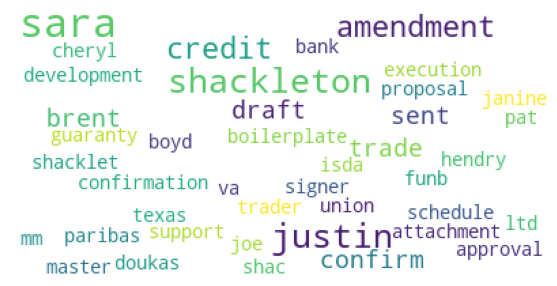

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.rcParams["figure.figsize"] = (10, 5) # Frame size
wordcloud1 = WordCloud(  
  background_color='white',
  stopwords=stop_words,
  max_words=224107,
  max_font_size=30, 
  random_state=42,
  # Render resolution
  width=400,
  height=200
  ).generate(str(corpus2_df))
                         
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [9]:
logo = np.array(Image.open("Enron.png"))
print(logo)
               
# generate word cloud
wc = WordCloud(  
  background_color='white',
  stopwords=stop_words,
  max_words=224107,
  mask=logo,
  max_font_size=30, 
  random_state=42,
    ).generate(str(corpus2_df))
wc.recolor(color_func=color_func, random_state=3)

wc.to_file('word_cloud.png') #save wordcloud to the computer
plt.figure(figsize=(500,350))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(-0.5, 1599.5, 999.5, -0.5)